In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/drive/MyDrive/vggdatasets/train'
test_dir = '/content/drive/MyDrive/vggdatasets/test'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.2, 1.8]
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 709 images belonging to 3 classes.
Found 179 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,978,883 (57.14 MB)

 Trainable params: 264,195 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 405ms/step - accuracy: 0.7139 - loss: 0.7237 - val_accuracy: 0.8250 - val_loss: 0.5663
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6562 - loss: 0.8870 - val_accuracy: 0.8000 - val_loss: 0.6023
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 369ms/step - accuracy: 0.6912 - loss: 0.7496 - val_accuracy: 0.7625 - val_loss: 0.6478
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7500 - loss: 0.6269 - val_accuracy: 0.7500 - val_loss: 0.6662
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - accuracy: 0.6747 - loss: 0.7465 - val_accuracy: 0.7875 - val_loss: 0.5620
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5000 - loss: 0.9002 - val_accuracy: 0.8000 - val_loss: 0.5562
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step - accuracy: 0.7035 - loss: 0.7079 - val_accuracy: 0.7937 - val_loss: 0.5539
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7812 - loss: 0.5496 - val_accuracy: 0.81

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.7985 - loss: 0.5273
Test Accuracy: 0.8100558519363403


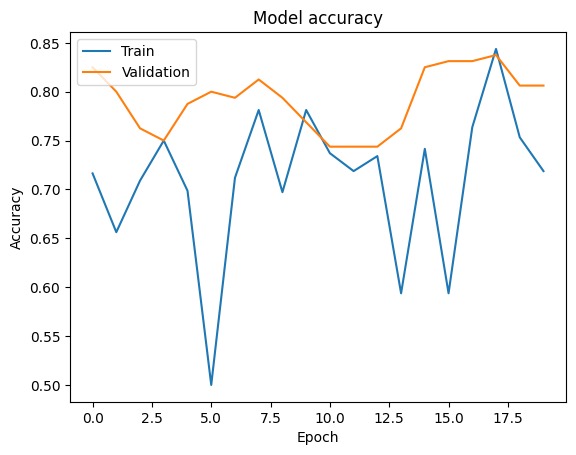

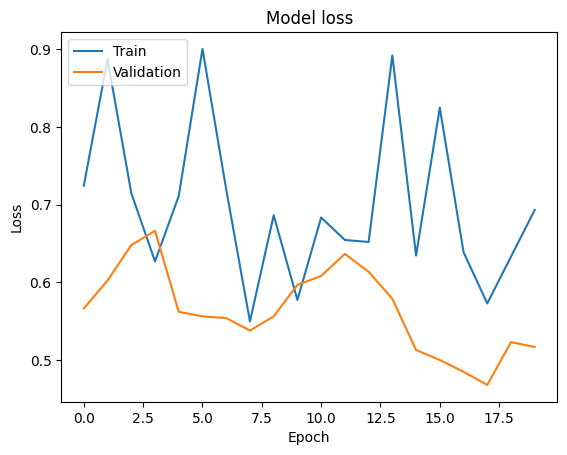

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
class_labels = ['colin_powell', 'donald_rumsfeld', 'george_w_bush']


In [ ]:
import os
image_folder_path = '/content/drive/MyDrive/vggdatasets/test'
print(f"Contents of the folder: {os.listdir(image_folder_path)}")


Contents of the folder: ['Colin_Powell', 'George_W_Bush', 'Donald_Rumsfeld']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


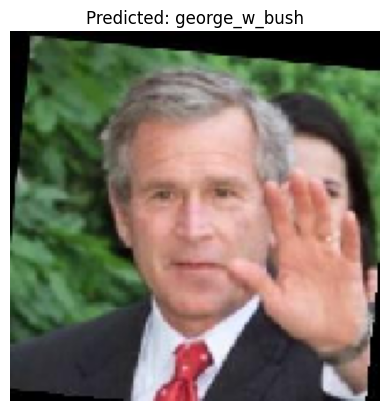

Image Path: /content/drive/MyDrive/vggdatasets/test/George_W_Bush/George_W_Bush_0500.jpg
Predicted Class: george_w_bush


In [ ]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
image_folder_path = '/content/drive/MyDrive/vggdatasets/test'
class_names = os.listdir(image_folder_path)
random_class = random.choice(class_names)
class_folder_path = os.path.join(image_folder_path, random_class)
image_files = [f for f in os.listdir(class_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
random_image_file = random.choice(image_files)
img_path = os.path.join(class_folder_path, random_image_file)
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
predicted_class_idx = np.argmax(predictions, axis=1)
class_labels = ['colin_powell', 'donald_rumsfeld', 'george_w_bush']  # Add your class labels
predicted_class_name = class_labels[predicted_class_idx[0]]


plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()

print(f"Image Path: {img_path}")
print(f"Predicted Class: {predicted_class_name}")
